<a href="https://colab.research.google.com/github/rahiakela/deep-learning-for-nlp-by-jason-brownlee/blob/part-3-word-embeddings/1_develop_word_embeddings_with_gensim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Develop Word Embeddings with Gensim

Word embeddings are a modern approach for representing text in natural language processing. Embedding algorithms like Word2Vec and GloVe are key to the state-of-the-art results achieved by neural network models on natural language processing problems like machine translation.

We will discover how to train and load word embedding models for natural language processing applications in Python using Gensim.

## Word Embeddings

A word embedding is an approach to provide a dense vector representation of words that capture something about their meaning. Word embeddings are an improvement over simpler bag-of-word model word encoding schemes like word counts and frequencies that result in large and sparse vectors (mostly 0 values) that describe documents but not the meaning of the words.

Word embeddings work by using an algorithm to train a set of fixed-length dense and continuous-valued vectors based on a large corpus of text. Each word is represented by a point in the embedding space and these points are learned and moved around based on the words that surround the target word. It is defining a word by the company that it keeps that allows the word embedding to learn something about the meaning of words. The vector space representation of the words provides a projection where words with similar meanings are locally clustered within the space.

The use of word embeddings over other text representations is one of the key methods that has led to breakthrough performance with deep neural networks on problems like machine translation.

We are going to look at how to use two different word embedding
methods called Word2Vec by researchers at Google and GloVe by researchers at Stanford.

## Gensim Python Library

Gensim is an open source Python library for natural language processing, with a focus on topic modeling. It is billed as "topic modeling for humans".

It is not an everything-including-the-kitchen-sink NLP research library (like NLTK); instead, Gensim is a mature, focused, and efficient suite of NLP tools for topic modeling. It supports an implementation of the Word2Vec word embedding for learning new word vectors from text.

It also provides tools for loading pre-trained word embeddings in a few formats and for making use and querying a loaded embedding.

## Develop Word2Vec Embedding

Word2Vec is one algorithm for learning a word embedding from a text corpus. There are two main training algorithms that can be used to learn the embedding from text:-
* **Continuous Bag-of-Words (CBOW)**
* **Skip-gram**

We will not get into the algorithms other than to say that they generally look at a window of words for each target word to provide context and in turn meaning for words.

Word2Vec models require a lot of text, e.g. the entire Wikipedia corpus. Nevertheless, we will demonstrate the principles using a small in-memory example of text. 

Gensim provides the Word2Vec class for working with a Word2Vec model. Learning a word embedding from text involves loading and organizing the text into sentences and providing them to the constructor of a new Word2Vec() instance.

```python
sentences = ...
model = Word2Vec(sentences)
```

Specifically, each sentence must be tokenized, meaning divided into words and prepared (e.g. perhaps pre-filtered and perhaps converted to a preferred case). The sentences could be text loaded into memory, or an iterator that progressively loads text, required for very large text corpora. 

There are many parameters on this constructor; a few noteworthy arguments you may wish to configure are:

* **size**: (default 100) The number of dimensions of the embedding, e.g. the length of the dense vector to represent each token (word).
* **window**: (default 5) The maximum distance between a target word and words around the target word.
* **min count**: (default 5) The minimum count of words to consider when training the model; words with an occurrence less than this count will be ignored.
* **workers**: (default 3) The number of threads to use while training.
* **sg**: (default 0 or CBOW) The training algorithm, either CBOW (0) or skip gram (1).

The defaults are often good enough when just getting started. If you have a lot of cores, as most modern computers do, I strongly encourage you to increase workers to match the number of cores (e.g. 8).

After the model is trained, it is accessible via the wv attribute. This is the actual word vector model in which queries can be made. 

For example, you can print the learned vocabulary of tokens (words) as follows:

```python
words = list(model.wv.vocab)
print(words)
```

You can review the embedded vector for a specific token as follows:

```python
print(model['word'])
```

Finally, a trained model can then be saved to file by calling the save word2vec format() function on the word vector model. By default, the model is saved in a binary format to save space.

```python
model.wv.save_word2vec_format('model.bin')
```

When getting started, you can save the learned model in ASCII format and review the contents. You can do this by setting binary=False when calling the save word2vec format() function.

```python
model.wv.save_word2vec_format('model.txt', binary=False)
```

The saved model can then be loaded again by calling the Word2Vec.load() function.

```python
model = Word2Vec.load('model.bin')
```

We can tie all of this together with a worked example. Rather than loading a large text document or corpus from file, we will work with a small, in-memory list of pre-tokenized sentences. 

The model is trained and the minimum count for words is set to 1 so that no words are ignored. After the model is learned, we summarize, print the vocabulary, then print a single vector for the word "sentence". 

Finally, the model is saved to a file in binary format, loaded,
and then summarized.



In [0]:
from gensim.models import Word2Vec

In [0]:
# define training data
sentences = [
  ['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
  ['this', 'is', 'the', 'second', 'sentence'],
  ['yet', 'another', 'sentence'],
  ['one', 'more', 'sentence'],
  ['and', 'the', 'final', 'sentence']         
]

# train model
model = Word2Vec(sentences, min_count=1)

# summarize the loaded model
print(model)

# summarize vocabulary
words = list(model.wv.vocab)
print(words)

# access vector for one word
print(model['sentence'])

# save model
model.save('model.bin')

# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=14, size=100, alpha=0.025)
['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']
[-0.00430853 -0.0010612  -0.00357043 -0.00197735  0.00101788 -0.00235918
  0.00463937 -0.00377156  0.00130901 -0.00418384 -0.00316141 -0.00134712
 -0.00272129  0.00435421 -0.00056567 -0.00234536 -0.00425877  0.00392617
  0.00442912 -0.00308037  0.00485346 -0.00371804  0.00076224  0.0004597
 -0.00173547 -0.00416696 -0.00301806  0.0021823   0.00284618  0.00062046
  0.00185371 -0.00080637 -0.00491324 -0.0041652  -0.00437492 -0.00403443
 -0.00348326 -0.00366579  0.00272375 -0.00273549  0.00140199 -0.00262868
  0.00167049 -0.00489838  0.00257384  0.00087063  0.00026339 -0.00349258
 -0.00273281 -0.00287726  0.00060782 -0.00323993 -0.00340895  0.00182926
 -0.00014312 -0.00092501 -0.00302666  0.00321592 -0.00160415 -0.00287781
  0.00051921 -0.00474417  0.00483934  0.00219409  0.00229238 -0.00028669
 -0.00054155 -0.00302478 -0.0018981

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
new_model.wv.vocab

{'and': <gensim.models.keyedvectors.Vocab at 0x7fa7c43d07b8>,
 'another': <gensim.models.keyedvectors.Vocab at 0x7fa7c43d0668>,
 'final': <gensim.models.keyedvectors.Vocab at 0x7fa7c43d0828>,
 'first': <gensim.models.keyedvectors.Vocab at 0x7fa7c43d0438>,
 'for': <gensim.models.keyedvectors.Vocab at 0x7fa7c43d04e0>,
 'is': <gensim.models.keyedvectors.Vocab at 0x7fa7c43d0358>,
 'more': <gensim.models.keyedvectors.Vocab at 0x7fa7c43d0748>,
 'one': <gensim.models.keyedvectors.Vocab at 0x7fa7c43d06d8>,
 'second': <gensim.models.keyedvectors.Vocab at 0x7fa7c43d0588>,
 'sentence': <gensim.models.keyedvectors.Vocab at 0x7fa7c43d0470>,
 'the': <gensim.models.keyedvectors.Vocab at 0x7fa7c43d03c8>,
 'this': <gensim.models.keyedvectors.Vocab at 0x7fa7c43d0278>,
 'word2vec': <gensim.models.keyedvectors.Vocab at 0x7fa7c43d0518>,
 'yet': <gensim.models.keyedvectors.Vocab at 0x7fa7c43d05f8>}

In [0]:
new_model.wv.vector_size

100

In [0]:
new_model.wv.vectors

array([[-4.3085273e-03, -1.0612011e-03, -3.5704260e-03, ...,
        -4.1756546e-03, -2.2089377e-04,  3.9614462e-03],
       [ 1.4891515e-03, -2.6343467e-03,  2.9473484e-03, ...,
        -4.0547433e-03, -1.7627738e-03,  3.8972714e-03],
       [ 4.3983115e-03,  9.0348138e-04,  3.3005201e-03, ...,
        -2.0481939e-03, -3.5778803e-03, -3.2986866e-03],
       ...,
       [-4.1768504e-03, -2.0467669e-03,  2.9037585e-03, ...,
        -3.4164891e-03,  3.9712605e-03, -4.2816061e-03],
       [-4.4812830e-03, -7.0602854e-04, -3.6400117e-03, ...,
        -2.2377546e-03,  3.6140149e-03, -4.4836070e-05],
       [ 3.8796724e-03, -7.7581120e-04,  1.7818528e-03, ...,
        -4.9471087e-03,  4.3437663e-03,  1.5712756e-04]], dtype=float32)

In [0]:
words = list(new_model.wv.vocab)
words

['this',
 'is',
 'the',
 'first',
 'sentence',
 'for',
 'word2vec',
 'second',
 'yet',
 'another',
 'one',
 'more',
 'and',
 'final']

In [0]:
print(new_model['sentence'])

[-0.00430853 -0.0010612  -0.00357043 -0.00197735  0.00101788 -0.00235918
  0.00463937 -0.00377156  0.00130901 -0.00418384 -0.00316141 -0.00134712
 -0.00272129  0.00435421 -0.00056567 -0.00234536 -0.00425877  0.00392617
  0.00442912 -0.00308037  0.00485346 -0.00371804  0.00076224  0.0004597
 -0.00173547 -0.00416696 -0.00301806  0.0021823   0.00284618  0.00062046
  0.00185371 -0.00080637 -0.00491324 -0.0041652  -0.00437492 -0.00403443
 -0.00348326 -0.00366579  0.00272375 -0.00273549  0.00140199 -0.00262868
  0.00167049 -0.00489838  0.00257384  0.00087063  0.00026339 -0.00349258
 -0.00273281 -0.00287726  0.00060782 -0.00323993 -0.00340895  0.00182926
 -0.00014312 -0.00092501 -0.00302666  0.00321592 -0.00160415 -0.00287781
  0.00051921 -0.00474417  0.00483934  0.00219409  0.00229238 -0.00028669
 -0.00054155 -0.00302478 -0.0018981  -0.00319882  0.00302625  0.00438174
 -0.00348394  0.00282924  0.00416329 -0.00488567 -0.00093039  0.00194827
  0.00499831  0.00405092  0.00242022  0.00200055 -0.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [0]:
print(new_model['final'])

[ 3.8796724e-03 -7.7581120e-04  1.7818528e-03 -1.9761817e-05
 -4.8673004e-03  2.5883447e-03  4.4909581e-03 -4.2883395e-03
 -3.2133108e-04 -1.4478170e-03  1.3506640e-03  3.2140932e-03
 -2.8894213e-03  6.1481632e-04  4.6842210e-03  3.4568678e-03
  4.7807409e-03 -2.2466546e-03 -6.2651181e-04  4.8206518e-03
 -1.7211207e-03 -2.8372414e-03  2.1281305e-03 -3.3642873e-03
 -3.4641868e-03  8.1896794e-04  3.9562634e-03  4.8880153e-03
 -1.4392596e-03 -3.7133589e-03 -2.2571457e-04  2.3168069e-03
  2.4909507e-03 -1.3405925e-03  3.6265196e-03  2.9054724e-03
 -2.8672514e-03  2.9091579e-03  4.4441326e-03  3.1988446e-03
  2.3390970e-03 -3.1612534e-03 -8.1592589e-04 -1.1796877e-03
 -4.6358840e-04 -3.6548402e-03  1.0328239e-03 -3.1002525e-03
 -2.2621928e-03  1.1083053e-03 -2.5899974e-03 -2.1482649e-04
  1.9820544e-03 -1.5525251e-03  4.6706358e-03  3.5251135e-03
 -1.5467710e-03  4.5245336e-03  1.0104139e-03  4.9600010e-03
  2.3403463e-03 -3.1592385e-03 -4.4357674e-03 -1.5747731e-03
 -4.6933461e-03  1.80199

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


You can see that with a little work to prepare your text document, you can create your own word embedding very easily with Gensim.

## Visualize Word Embedding

After you learn word embedding for your text data, it can be nice to explore it with visualization. You can use classical projection methods to reduce the high-dimensional word vectors to two-dimensional plots and plot them on a graph. The visualizations can provide a qualitative diagnostic for your learned model. 

We can retrieve all of the vectors from a trained model as follows:

```python
X = model[model.wv.vocab]
```

We can then train a projection method on the vectors, such as those methods offered in scikit-learn, then use Matplotlib to plot the projection as a scatter plot. Let's look at an example
with Principal Component Analysis or PCA.

## Plot Word Vectors Using PCA

We can create a 2-dimensional PCA model of the word vectors using the scikit-learn PCA class as follows.

```python
pca = PCA(n_components=2)
result = pca.fit_transform(X)
```

The resulting projection can be plotted using Matplotlib as follows, pulling out the two dimensions as x and y coordinates.

```python
pyplot.scatter(result[:, 0], result[:, 1])
```

We can go one step further and annotate the points on the graph with the words themselves.

A crude version without any nice offsets looks as follows.

```python
words = list(model.wv.vocab)
for i, word in enumerate(words):
  pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
```

Putting this all together with the model from the previous section.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


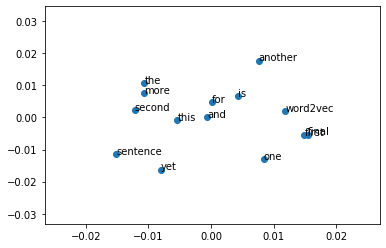

In [0]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

# define training data
sentences = [
  ['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
  ['this', 'is', 'the', 'second', 'sentence'],
  ['yet', 'another', 'sentence'],
  ['one', 'more', 'sentence'],
  ['and', 'the', 'final', 'sentence']         
]

# train model
model = Word2Vec(sentences, min_count=1)

# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
results = pca.fit_transform(X)

# create a scatter plot of the projection
pyplot.scatter(results[:, 0], results[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
  pyplot.annotate(word, xy=(results[i, 0], results[i, 1]))
pyplot.show()

## Load Google's Word2Vec Embedding

Training your own word vectors may be the best approach for a given NLP problem. But it can take a long time, a fast computer with a lot of RAM and disk space, and perhaps some expertise in finessing the input data and training algorithm. An alternative is to simply use an existing pre-trained word embedding. Along with the paper and code for Word2Vec, Google also published a pre-trained Word2Vec model on the Word2Vec Google Code Project.

A pre-trained model is nothing more than a file containing tokens and their associated word vectors. The pre-trained Google Word2Vec model was trained on Google news data (about 100 billion words); it contains 3 million words and phrases and was fit using 300-dimensional word vectors. It is a 1.53 Gigabyte file.

The Gensim library provides tools to load this file. Specifically, you can call the KeyedVectors.load word2vec format() function to load this model into memory.

```python
from gensim.models import KeyedVectors
filename = 'GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)
```

Another interesting thing that you can do is do a little linear algebra arithmetic with words. 

For example, a popular example described in lectures and introduction papers is:

```python
queen = (king - man) + woman
```

That is the word queen is the closest word given the subtraction of the notion of man from king and adding the word woman. The man-ness in king is replaced with woman-ness to give us queen. A very cool concept. 

Gensim provides an interface for performing these types of
operations in the most similar() function on the trained or loaded model.

```python
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)
```

We will download Google Word2Vec model file from web.

In [0]:
import os
import tqdm
import requests
import re

In [0]:
! pip install pugnlp

In [0]:
from pugnlp.futil import path_status, find_files

Download the Google Word2Vec model

In [0]:
BIG_URLS = {
    'w2v': ('https://www.dropbox.com/s/965dir4dje0hfi4/GoogleNews-vectors-negative300.bin.gz?dl=1', 1647046227),
    'g2v': ('http://nlp.stanford.edu/data/glove.6B.zip',)
}

In [0]:
# These functions are part of the nlpia package which can be pip installed and run from there.
def dropbox_basename(url):
    filename = os.path.basename(url)
    match = re.findall(r'\?dl=[0-9]$', filename)
    if match:
        return filename[:-len(match[0])]
    return filename

def download_file(url, data_path='.', filename=None, size=None, chunk_size=4096, verbose=True):
    """Uses stream=True and a reasonable chunk size to be able to download large (GB) files over https"""
    if filename is None:
        filename = dropbox_basename(url)
    file_path = os.path.join(data_path, filename)
    if url.endswith('?dl=0'):
        url = url[:-1] + '1'  # noninteractive download
    if verbose:
        tqdm_prog = tqdm
        print('requesting URL: {}'.format(url))
    else:
        tqdm_prog = no_tqdm
    r = requests.get(url, stream=True, allow_redirects=True)
    size = r.headers.get('Content-Length', None) if size is None else size
    print('remote size: {}'.format(size))

    stat = path_status(file_path)
    print('local size: {}'.format(stat.get('size', None)))
    if stat['type'] == 'file' and stat['size'] == size:  # TODO: check md5 or get the right size of remote file
        r.close()
        return file_path

    print('Downloading to {}'.format(file_path))

    with open(file_path, 'wb') as f:
        for chunk in r.iter_content(chunk_size=chunk_size):
            if chunk:  # filter out keep-alive chunks
                f.write(chunk)

    r.close()
    return file_path

def untar(fname):
    if fname.endswith("tar.gz"):
        with tarfile.open(fname) as tf:
            tf.extractall()
    else:
        print("Not a tar.gz file: {}".format(fname))

In [0]:
download_file(BIG_URLS['w2v'][0])

requesting URL: https://www.dropbox.com/s/965dir4dje0hfi4/GoogleNews-vectors-negative300.bin.gz?dl=1
remote size: 1647046227
local size: 1647046227


'./GoogleNews-vectors-negative300.bin.gz'

We can put all of this together.

In [0]:
from gensim.models import KeyedVectors

filename = 'GoogleNews-vectors-negative300.bin.gz'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1) # find the top 1 most similar words
print(result)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('queen', 0.7118192911148071)]


In [0]:
# find the top 2 most similar words
result = model.most_similar_cosmul(positive=['woman', 'king'], negative=['man'], topn=2) 
print(result)

[('queen', 0.9314123392105103), ('monarch', 0.858533501625061)]


In [0]:
# find the top-N most similar words
result = model.most_similar_cosmul(positive=['woman', 'king'], negative=['man']) 
print(result)

[('queen', 0.9314123392105103), ('monarch', 0.858533501625061), ('princess', 0.8476566076278687), ('Queen_Consort', 0.8150269985198975), ('queens', 0.8099815249443054), ('crown_prince', 0.808997631072998), ('royal_palace', 0.8027306795120239), ('monarchy', 0.801961362361908), ('prince', 0.800979733467102), ('empress', 0.7958388328552246)]


In [0]:
# filter not similer word
print(model.doesnt_match('breakfast cereal dinner lunch').split())

['k']


/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
similarity = model.similarity('woman', 'man')
print(similarity)

0.76640123


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
result = model.similar_by_word('cat')
print(result)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('cats', 0.8099379539489746), ('dog', 0.7609456777572632), ('kitten', 0.7464985251426697), ('feline', 0.7326233983039856), ('beagle', 0.7150583267211914), ('puppy', 0.7075453996658325), ('pup', 0.6934291124343872), ('pet', 0.6891531348228455), ('felines', 0.6755931377410889), ('chihuahua', 0.6709762215614319)]


In [0]:
sentence_obama = 'Obama speaks to the media in Illinois'.lower().split()
sentence_president = 'The president greets the press in Chicago'.lower().split()
similarity = model.wmdistance(sentence_obama, sentence_president)
print(similarity)

2.2813313673465077


In [0]:
distance = model.distance("media", "media")
print(distance)

0.0


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


## Load Stanford's GloVe Embedding

Like Word2Vec, the GloVe researchers also provide pre-trained word vectors, in this case, a great selection to choose from. You can download the GloVe pre-trained word vectors and load them easily with Gensim. The first step is to convert the GloVe file format to the Word2Vec file format. The only difference is the addition of a small header line. This can be done by calling
the glove2word2vec() function.

```python
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'glove.txt'
word2vec_output_file = 'word2vec.txt'
glove2word2vec(glove_input_file, word2vec_output_file)
```

Once converted, the file can be loaded just like Word2Vec file above. Let's make this concrete with an example. You can download the smallest GloVe pre-trained model from the GloVe
website. It an 822 Megabyte zip file with 4 different models (50, 100, 200 and 300-dimensional vectors) trained on Wikipedia data with 6 billion tokens and a 400,000 word vocabulary.

```python
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)
```

You now have a copy of the GloVe model in Word2Vec format with the filename glove.6B.100d.txt.word2vec. Now we can load it and perform the same (king - man) + woman = ? test as in the previous section.

```python
from gensim.models import KeyedVectors
# load the Stanford GloVe model
filename = 'glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
```

Pulling all of this together.


In [10]:
# download glove.6B 
download_file(BIG_URLS['g2v'][0])

requesting URL: http://nlp.stanford.edu/data/glove.6B.zip
remote size: 862182613
local size: None


'./glove.6B.zip'

In [0]:
# unzip zip file

import zipfile

with zipfile.ZipFile('glove.6B.zip', 'r') as zip_ref:
    zip_ref.extractall('glove')

In [16]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

# convert glove to word2vec format
glove_input_file = 'glove/glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

# load the converted model
filename = 'glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)

# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


[('queen', 0.7698541283607483)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [17]:
# find the top 2 most similar words
result = model.most_similar_cosmul(positive=['woman', 'king'], negative=['man'], topn=2) 
print(result)

[('queen', 0.8964555859565735), ('monarch', 0.8495979309082031)]


In [18]:
# find the top-N most similar words
result = model.most_similar_cosmul(positive=['woman', 'king'], negative=['man']) 
print(result)

[('queen', 0.8964555859565735), ('monarch', 0.8495979309082031), ('throne', 0.8447030782699585), ('princess', 0.8371668457984924), ('elizabeth', 0.835679292678833), ('daughter', 0.8348594307899475), ('prince', 0.8230059742927551), ('mother', 0.8154449462890625), ('margaret', 0.8147734999656677), ('father', 0.8100855350494385)]


In [19]:
# filter not similer word
print(model.doesnt_match('breakfast cereal dinner lunch').split())

['i']


/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [20]:
similarity = model.similarity('woman', 'man')
print(similarity)

0.8323495


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [21]:
result = model.similar_by_word('cat')
print(result)

[('dog', 0.8798074722290039), ('rabbit', 0.7424426674842834), ('cats', 0.7323004007339478), ('monkey', 0.7288709878921509), ('pet', 0.7190139889717102), ('dogs', 0.7163872718811035), ('mouse', 0.6915250420570374), ('puppy', 0.6800068020820618), ('rat', 0.6641027331352234), ('spider', 0.6501135230064392)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [22]:
sentence_obama = 'Obama speaks to the media in Illinois'.lower().split()
sentence_president = 'The president greets the press in Chicago'.lower().split()
similarity = model.wmdistance(sentence_obama, sentence_president)
print(similarity)

3.4892687395218687


In [23]:
distance = model.distance("media", "media")
print(distance)

5.960464477539063e-08


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
